In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
output_dir = output_dir.replace('\\train','')
os.chdir(output_dir)

In [5]:
#Save training images
output_dir = os.getcwd()
output_dir = output_dir+'\\train'
os.chdir(output_dir)
for i in range(len(df_train)):
    fname = str(i+1)+'.jpg'
    plt.imsave(fname,np.reshape(np.array(df_train.iloc[i,1:]),(28,28)))

output_dir = output_dir.replace('\\train','')
os.chdir(output_dir)

In [6]:
#Save test images
output_dir = os.getcwd()
output_dir = output_dir+'\\test'
os.chdir(output_dir)
for i in range(len(df_test)):
    fname = str(i+1)+'.jpg'
    plt.imsave(fname,np.reshape(np.array(df_test.iloc[i,:]),(28,28)))

output_dir = output_dir.replace('\\test','')
os.chdir(output_dir)

In [7]:
#create X column in traing df
df_train['X']=''
for i in range(len(df_train)):
    df_train.loc[i,'X'] = str(i+1)+'.jpg'

df_train_keras = df_train[['X','label']]

In [8]:
#create X column in test DF
df_test['X']=''
for i in range(len(df_test)):
    df_test.loc[i,'X'] = str(i+1)+'.jpg'

df_test_keras = df_test[['X']]

In [28]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator, image
from keras.models import Sequential, load_model,save_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [10]:
img_width = 28
img_height = 28
input_shape = (img_width, img_height, 3)

train_data_dir = './train/'
validation_data_dir = './test/'
nb_train_samples =42000
nb_validation_samples = 10500
epochs = 10
batch_size = 16

In [11]:
#Define CNN
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10)) 
model.add(Activation('softmax')) 






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
#Compile function
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy']) 

In [13]:
#data generator
train_datagen = ImageDataGenerator( 
    rescale=1. / 255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,validation_split=0.25) 
  
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

In [ ]:
validation_generator = test_datagen.flow_from_directory( 
    validation_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary') 

In [24]:
#from source
train_generator=train_datagen.flow_from_dataframe(
dataframe=df_train_keras,
directory="./train/",
x_col=("X"),
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(28,28))

valid_generator=train_datagen.flow_from_dataframe(
dataframe=df_train_keras,
directory="./train/",
x_col="X",
y_col="label",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(28,28))

Found 31500 validated image filenames belonging to 10 classes.
Found 10500 validated image filenames belonging to 10 classes.


In [25]:
#test generator
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=df_test_keras,
directory="./test/",
x_col="X",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(28,28))

Found 28000 validated image filenames.


In [26]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





984/984 [==============================] - 30s 31ms/step - loss: 1.0447 - acc: 0.6457 - val_loss: 0.4416 - val_acc: 0.8648
Epoch 2/10
984/984 [==============================] - 29s 29ms/step - loss: 0.5333 - acc: 0.8278 - val_loss: 0.2936 - val_acc: 0.9046
Epoch 3/10
984/984 [==============================] - 28s 29ms/step - loss: 0.4038 - acc: 0.8734 - val_loss: 0.2216 - val_acc: 0.9334
Epoch 4/10
984/984 [==============================] - 28s 29ms/step - loss: 0.3322 - acc: 0.8983 - val_loss: 0.1953 - val_acc: 0.9406
Epoch 5/10
984/984 [==============================] - 28s 29ms/step - loss: 0.2973 - acc: 0.9083 - val_loss: 0.1512 - val_acc: 0.9552
Epoch 6/10
984/984 [==============================] - 28s 28ms/step - loss: 0.2683 - acc: 0.9179 - val_loss: 0.1663 - val_acc: 0.9494
Epoch 7/10
984/984 [==============================] - 28s 29ms/step - loss: 0.2532 - acc: 0.92

In [ ]:
#model fitting
model.fit_generator( 
    train_generator, 
    steps_per_epoch=nb_train_samples // batch_size, 
    epochs=epochs, 
    validation_data=validation_generator, 
    validation_steps=nb_validation_samples // batch_size) 

In [29]:
#save the model
model.save_weights('model_saved_office.h5')
model.save("model.h5")

In [30]:
#Evaluate the model
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_TEST)

[0.15919984173763066, 0.9556526723026222]

In [31]:
#predict the output
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

875/875 [==============================] - 9s 10ms/step


In [32]:
predicted_class_indices=np.argmax(pred,axis=1)

In [44]:
#predict labels
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [45]:
#save result to csv file
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results_office.csv",index=False)

In [6]:
#load weights
#model.save_weights('model_saved.h5') 
#model = create_model()
model.load_weights('./model_saved.h5')

In [92]:
#save image 
plt.imsave("three.jpg",np.reshape(np.array(df_train.iloc[4,1:]),(28,28)))

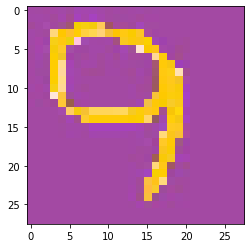

In [137]:
#img_width, img_height = 150, 150
img = image.load_img('two.jpg', target_size = (img_width, img_height))
plt.imshow(img)
img = image.img_to_array(img)
img = np.expand_dims(img, axis = 0)

In [138]:
model.predict(img)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [139]:
np.argmax(model.predict(img),axis=1)[0]

8

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [23]:
#df_test_keras
#df_train_keras
#df_test_keras['X'] = df_test_keras['X'].astype(str)
#df_train_keras

C:\Users\rajeevt\AppData\Local\Continuum\anaconda3.5\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [166]:
result = pd.read_csv('results_office.csv')

In [167]:
def create_fld(x):
    return x.Filename.split('.')[0]

In [168]:
result['ImageId'] =result.apply(create_fld,axis=1)
#result.columns

In [169]:
result.drop(columns=['Filename'],axis=1,inplace=True)

In [171]:
result.rename(columns={'Predictions':'Label'},inplace=True)

In [174]:
result = result[['ImageId','Label']]

In [176]:
result.to_csv('results_office.csv',index=False)

In [178]:
df_train_keras

,X,label
0,1.jpg,1
1,2.jpg,0
2,3.jpg,1
3,4.jpg,4
4,5.jpg,0
...,...,...
41995,41996.jpg,0
41996,41997.jpg,1
41997,41998.jpg,7
41998,41999.jpg,6
